In [0]:
from IPython.display import Image as IImage,display
import numpy as np
import PIL
from PIL import Image
import random
import requests
import tensorflow as tf

In [5]:
tf.enable_eager_execution()
tf.executing_eagerly()

True

In [0]:
tfe = tf.contrib.eager

In [0]:
d = requests.get("http://media.dulich24.com.vn/diemden/ho-hoan-kiem-6487/ho-hoan-kiem.jpg")
with open("hanoi.jpg","wb") as f:
  f.write(d.content)

In [0]:
img = PIL.Image.open('hanoi.jpg')
img.load()
img_arr = np.array(img)

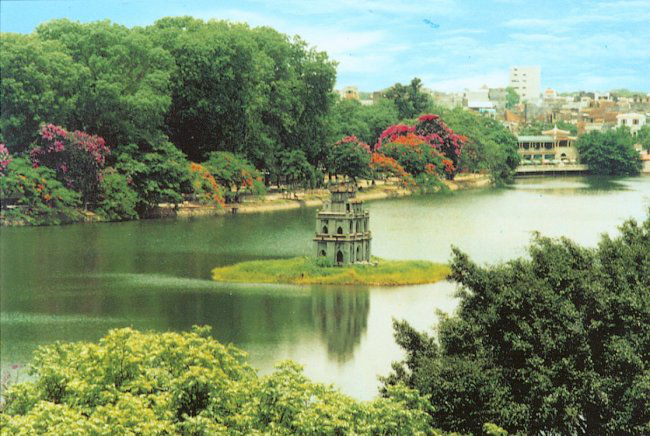

In [14]:
PIL.Image.fromarray(img_arr)

In [0]:
fliped_img_arr = tf.image.random_flip_left_right(img_arr)

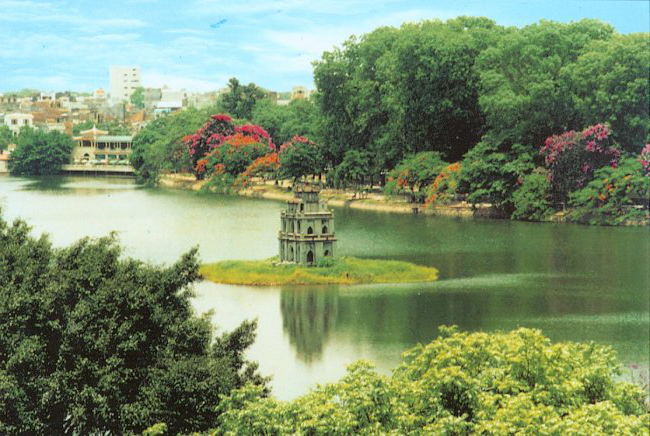

In [18]:

PIL.Image.fromarray(fliped_img_arr.numpy())

In [33]:
rotated_90_img_arr = tf.compat.v1.image.rot90(img_arr,k= 1)
rotated_90_img_arr

<tf.Tensor: id=159, shape=(650, 436, 3), dtype=uint8, numpy=
array([[[190, 237, 253],
        [189, 237, 251],
        [195, 241, 254],
        ...,
        [ 40,  39,  37],
        [ 38,  38,  36],
        [ 45,  45,  43]],

       [[190, 237, 253],
        [189, 237, 251],
        [195, 241, 254],
        ...,
        [ 40,  39,  37],
        [ 38,  38,  36],
        [ 44,  44,  42]],

       [[188, 235, 251],
        [190, 238, 252],
        [195, 241, 254],
        ...,
        [ 38,  37,  35],
        [ 41,  41,  39],
        [ 49,  49,  47]],

       ...,

       [[130, 200, 225],
        [159, 229, 254],
        [161, 231, 255],
        ...,
        [195, 217, 119],
        [211, 232, 137],
        [209, 230, 137]],

       [[129, 199, 224],
        [158, 228, 253],
        [161, 231, 255],
        ...,
        [180, 195,  78],
        [197, 211,  97],
        [198, 212,  98]],

       [[ 91, 161, 186],
        [121, 191, 216],
        [125, 195, 220],
        ...,
        [129,

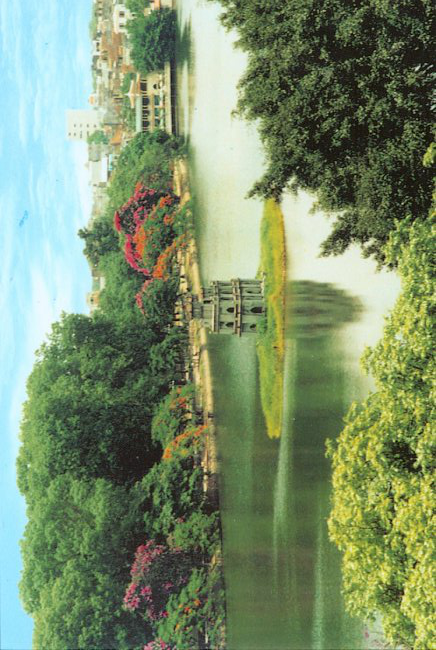

In [25]:

PIL.Image.fromarray(rotated_90_img_arr.numpy())

In [0]:
resized_img = tf.image.resize(img_arr, size=(300, 300), preserve_aspect_ratio=False)



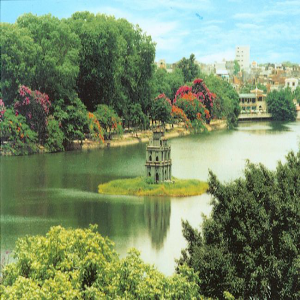

In [37]:
PIL.Image.fromarray(tf.cast(resized_img,dtype = 'uint8').numpy())

In [0]:
def adjust_hue(img_arr,min_val,max_val):
  ops = tf.random.uniform((),minval = min_val,maxval = max_val) // scalar in tensorFlow: ()
  adjusted_hue_img = tf.image.adjust_hue(img_arr, delta=ops)
  return tf.cast(adjusted_hue_img,dtype = 'uint8').numpy()

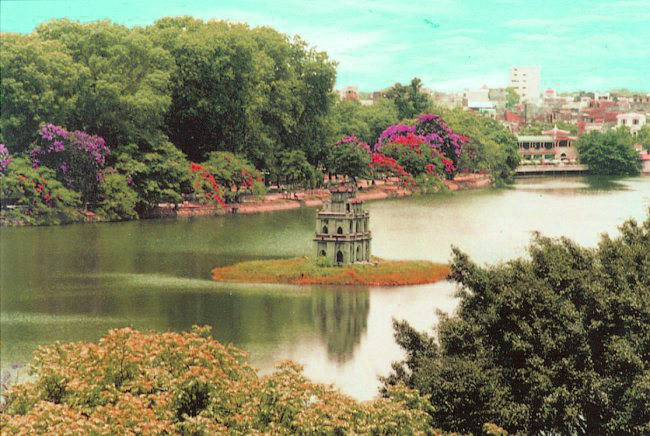

In [48]:
PIL.Image.fromarray(adjust_hue(img_arr,-0.1,2))

In [0]:
def ajust_brightness(image, min_val, max_val):
    r = tf.random.uniform([], minval=min_val, maxval=max_val)
    image = tf.image.adjust_brightness(image, delta=r)
    return tf.cast(image, tf.uint8).numpy()

In [0]:
min_val = 0.1
max_val = 0.2

In [0]:

adjusted_brightness_img = ajust_brightness(img_arr, min_val, max_val)

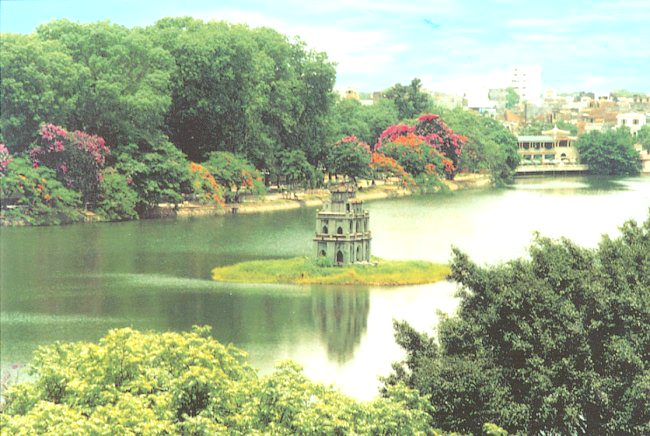

In [58]:
PIL.Image.fromarray(adjusted_brightness_img)

In [0]:
def adjust_contrast(image, min_val, max_val):
    r = tf.random.uniform([], minval=min_val, maxval=max_val)
    image = tf.image.adjust_contrast(image, contrast_factor=r)
    return tf.cast(image, tf.uint8).numpy()

In [0]:

min_val = 0.1
max_val = 2.0

In [0]:

adjusted_contrast_img = adjust_contrast(img_arr, min_val, max_val)

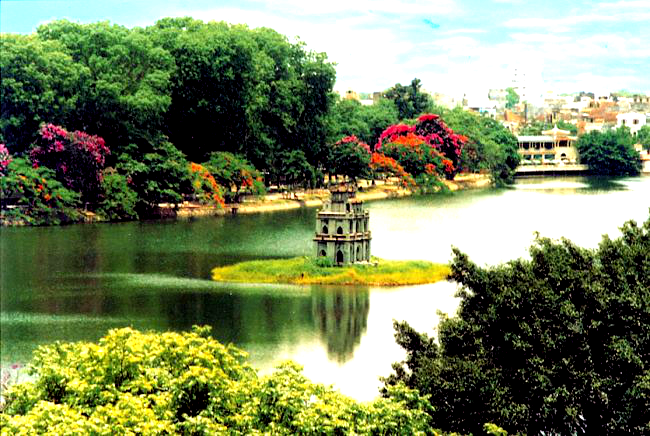

In [64]:
PIL.Image.fromarray(adjusted_contrast_img)